# Face Detect DLIB

In [23]:
%load_ext autoreload
%autoreload 2

# put system imports here
import os
import sys
from os.path import join
from glob import glob
from pathlib import Path
import random

# put pip/conda installed imports here
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt

# put local imports here
fp_app_root = join(Path(os.getcwd()).parent)
sys.path.append(fp_app_root)
from app.settings import app_cfg
from app.utils import file_utils, draw_utils, im_utils
from app.models.bbox import BBoxNorm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# https://github.com/davisking/dlib
import dlib

## Load image

In [4]:
filepaths = glob(join(app_cfg.DIR_IMAGES, '*.jpg'))
fp_im = filepaths[random.randint(0, len(filepaths))]
im_bgr = cv.imread(fp_im)

## Initialize dlib

- if you haven't, download the models file

In [15]:
# init dlib
predictor = dlib.shape_predictor(app_cfg.FP_DLIB_PREDICTOR)
detector = dlib.get_frontal_face_detector()

In [16]:
def detect_faces_dlib(im,pyramids=0):
  rects = detector(im, pyramids)
  faces = [ (r.left() ,r.top(), r.right(), r.bottom()) for r in rects] #x1,y1,x2,y2
  return faces

In [17]:
# Draw high-confidence faces
faces = detect_faces_dlib(im_bgr,pyramids=0)
print("Found {} face(s)".format(len(faces)))

Found 1 face(s)


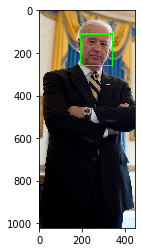

In [24]:
# Draw faces
im_dst = im_bgr.copy()
for face in faces:
  x1,y1,x2,y2 = face
  cv.rectangle(im_dst,(x1,y1),(x2,y2),(0,255,0),3)

# now use shortcut from im_utils
plt.imshow(im_utils.bgr2rgb(im_dst))

In [ ]:
# Save and compare detection to Haarcascade
fpath_out = osp.join(cfg.OUTPUT_DIR,'ch4_dlb_face.png')
cv2.imwrite(fpath_out,dst)